In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Car_details v3.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.set_index(df['name'],inplace = True)

In [5]:
df.drop(df[['name']],axis = 1,inplace = True)

In [6]:
df = df[~df['torque'].str.contains('kgm',na = False)]

In [7]:
df['torque_nm'] = df['torque'].str.split('Nm@',expand = True)[0] 

In [8]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_nm
name,,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250
Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,113.75nm@ 4000rpm
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,59
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,170


In [9]:
df = df[~df['torque_nm'].str.contains('nm',na = True)]

In [10]:
df['torque_rpm'] = df['torque'].str.split(' ',expand = True)[1]

In [11]:
df['torque_rpm'] = df['torque_rpm'].str.strip('rpm')

In [12]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_nm,torque_rpm
name,,,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190,2000
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250,1500-2500
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,59,2500
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,170,1800-2400
Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,160,2000


In [13]:
df['min_rpm'] = df['torque_rpm'].str.split('-',expand = True)[0]

In [14]:
df['max_rpm'] = df['torque_rpm'].str.split('-',expand = True)[1]

In [15]:
df['max_rpm'].fillna(df['min_rpm'],inplace = True)

In [16]:
df['torque_rpm'].str.contains('~',na = False).value_counts()

False    7165
True        2
Name: torque_rpm, dtype: int64

In [17]:
df = df[~df['torque_rpm'].str.contains('~',na = False)]

In [18]:
df.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_nm,torque_rpm,min_rpm,max_rpm
name,,,,,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,190,2000,2000,2000
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,250,1500-2500,1500,2500
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,59,2500,2500,2500
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,170,1800-2400,1800,2400
Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,160,2000,2000,2000


In [19]:
df = df[~df['min_rpm'].str.contains('~',na = False)]

In [20]:
df = df[~df['max_rpm'].str.contains('~',na = False)]

In [21]:
df['max_rpm'] = pd.to_numeric(df['max_rpm'],errors ='coerce')
df['min_rpm'] = pd.to_numeric(df['min_rpm'],errors ='coerce')

In [22]:
df['torque_rpm'] = (df['max_rpm'] + df['min_rpm'])/2

In [23]:
df['torque_rpm'].head()

name
Maruti Swift Dzire VDI                  2000.0
Skoda Rapid 1.5 TDI Ambition            2000.0
Maruti 800 DX BSII                      2500.0
Toyota Etios VXD                        2100.0
Ford Figo Diesel Celebration Edition    2000.0
Name: torque_rpm, dtype: float64

In [24]:
df = df.drop(columns = ['torque','max_rpm','min_rpm'])

In [25]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
name,,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190,2000.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250,2000.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0,59,2500.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0,170,2100.0
Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0,160,2000.0


In [26]:
df['mileage'] = df['mileage'].str.strip('kmpl')
df['engine'] = df['engine'].str.strip('CC')
df['max_power'] = df['max_power'].str.strip('bhp')

In [27]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_nm,torque_rpm
name,,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190,2000.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250,2000.0
Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796,37,4.0,59,2500.0
Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.1,5.0,170,2100.0
Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0,1399,68.1,5.0,160,2000.0


In [28]:
dum = pd.get_dummies(df[['fuel','seller_type','transmission','owner']])

In [29]:
X_= df.drop(columns = ['fuel','seller_type','transmission','owner'])

In [30]:
X_= pd.concat([X_,dum] , axis = 1)

In [31]:
y  = df['selling_price']

In [32]:
#filt = (X_['engine'].str.contains('kg') == True)

In [33]:
#X_[filt]

In [34]:
X_['mileage']= X_['mileage'].str.strip('km/kg')
X_['engine']= X_['engine'].str.strip('km/kg')


In [35]:
for i in X_.columns:
    X_[f'{i}'] = pd.to_numeric(X_[f'{i}'],errors = 'coerce')

In [36]:
X_.astype('float64')
X_.dropna()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,torque_rpm,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
name,,,,,,,,,,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248,74.00,5.0,190.0,2000.0,0,...,0,1,0,0,1,1,0,0,0,0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498,103.52,5.0,250.0,2000.0,0,...,0,1,0,0,1,0,0,1,0,0
Maruti 800 DX BSII,2001,45000,5000,16.10,796,37.00,4.0,59.0,2500.0,0,...,0,1,0,0,1,0,0,1,0,0
Toyota Etios VXD,2011,350000,90000,23.59,1364,67.10,5.0,170.0,2100.0,0,...,0,1,0,0,1,1,0,0,0,0
Ford Figo Diesel Celebration Edition,2013,200000,169000,20.00,1399,68.10,5.0,160.0,2000.0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.54,1396,88.73,5.0,219.7,2125.0,0,...,0,1,0,0,1,0,0,1,0,0
Hyundai i20 Magna,2013,320000,110000,18.50,1197,82.85,5.0,113.7,4000.0,0,...,0,1,0,0,1,1,0,0,0,0
Maruti Swift Dzire ZDi,2009,382000,120000,19.30,1248,73.90,5.0,190.0,2000.0,0,...,0,1,0,0,1,1,0,0,0,0


In [37]:
X = X_.drop(columns=['selling_price','torque_nm','torque_rpm' ])

In [38]:
y = df['selling_price']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [40]:
xgb_model = XGBRegressor().fit(X_train,y_train)

In [41]:
prim_y_preds = xgb_model.predict(X_test)

In [42]:
prim_mse = np.sqrt(mean_squared_error(y_test,prim_y_preds))

In [43]:
prim_mse

124086.89602731596

In [44]:
xgb_params = {'learning_rate':[0.3,0.1,0.01],
               'max_depth':[2,3,5,10],
              'n_estimators':[100,200],
              'colsample_bytree':[0.4,1,0.5]
             }

In [45]:
cv_model = GridSearchCV (xgb_model,xgb_params,cv = 10,verbose =2,n_jobs = -1 )

In [46]:
cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_job...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=-1,
    

In [51]:
cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200}

In [52]:
tuned_xgb = XGBRegressor(colsample_bytree=1 , learning_rate=0.1 ,  max_depth=10 , n_estimators=200).fit(X_train,y_train)

In [53]:
y_pred = tuned_xgb.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_pred,y_test))

128982.28061344312

In [ ]:
#Visualisation


In [59]:
x_values =  X.index

In [58]:
y_values = y

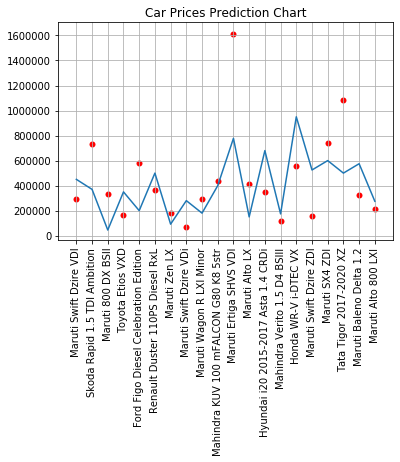

In [91]:
plt.xlabel = 'Car Models'
plt.ylabel = 'Prices'
plt.plot(x_values[0:20],y_values[0:20])
plt.xticks(rotation=90)
plt.scatter(x_values[0:20],y_pred[0:20],linewidth=0.0001,color= 'r')
plt.title('Car Prices Prediction Chart')
plt.grid()

In [97]:
from catboost import CatBoostRegressor

In [99]:
cat_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.052648
0:	learn: 817811.8333382	total: 104ms	remaining: 1m 43s
1:	learn: 784363.3948373	total: 107ms	remaining: 53.3s
2:	learn: 750518.9415916	total: 109ms	remaining: 36.3s
3:	learn: 718160.5480786	total: 111ms	remaining: 27.7s
4:	learn: 688285.2009810	total: 113ms	remaining: 22.6s
5:	learn: 661254.2250560	total: 116ms	remaining: 19.2s
6:	learn: 634996.6122504	total: 118ms	remaining: 16.7s
7:	learn: 609372.1076111	total: 120ms	remaining: 14.9s
8:	learn: 584904.1312549	total: 122ms	remaining: 13.4s
9:	learn: 562238.6413401	total: 124ms	remaining: 12.3s
10:	learn: 540175.5029690	total: 126ms	remaining: 11.3s
11:	learn: 520528.9878822	total: 127ms	remaining: 10.5s
12:	learn: 500149.7303259	total: 129ms	remaining: 9.81s
13:	learn: 481868.8817804	total: 131ms	remaining: 9.22s
14:	learn: 464643.2396722	total: 133ms	remaining: 8.72s
15:	learn: 448380.6299861	total: 135ms	remaining: 8.27s
16:	learn: 432687.0596864	total: 136ms	remaining: 7.88s
17:	learn: 417430.7192892	t

In [100]:
prim_pred = cat_model.predict(X_test)

In [101]:
np.sqrt(mean_squared_error(prim_pred,y_test))

123068.31114669162

In [102]:
#Model TUNNNING

In [103]:
cat_params = {'iterations':[200,500],
             'learning_rate':[0.001,0.1],
              'depth':[3,6],
               }

In [104]:
CAT_CV = GridSearchCV(cat_model,cat_params,cv = 10,n_jobs = -1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   44.0s finished


0:	learn: 784702.0236704	total: 13ms	remaining: 6.48s
1:	learn: 722230.8093937	total: 21.5ms	remaining: 5.36s
2:	learn: 663968.7927882	total: 29ms	remaining: 4.81s
3:	learn: 611171.5721797	total: 36.5ms	remaining: 4.53s
4:	learn: 564638.2749204	total: 40.2ms	remaining: 3.98s
5:	learn: 524408.7942355	total: 43.3ms	remaining: 3.57s
6:	learn: 486575.0747623	total: 46.3ms	remaining: 3.26s
7:	learn: 452386.5125941	total: 49.9ms	remaining: 3.07s
8:	learn: 422914.1126023	total: 53.6ms	remaining: 2.92s
9:	learn: 395920.0730615	total: 57.5ms	remaining: 2.82s
10:	learn: 372649.1695511	total: 61.2ms	remaining: 2.72s
11:	learn: 350263.5749352	total: 64.7ms	remaining: 2.63s
12:	learn: 329948.1189037	total: 66.7ms	remaining: 2.5s
13:	learn: 313650.0991030	total: 68.7ms	remaining: 2.38s
14:	learn: 297691.7684760	total: 70.6ms	remaining: 2.28s
15:	learn: 284334.3150656	total: 72.8ms	remaining: 2.2s
16:	learn: 271512.9199950	total: 74.8ms	remaining: 2.13s
17:	learn: 260110.8382113	total: 77.7ms	remaini

In [105]:
CAT_CV.best_params_ 

{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [106]:
cat_model = CatBoostRegressor(depth=6,iterations=500,learning_rate=0.1).fit(X_train,y_train)

0:	learn: 784702.0236704	total: 3.14ms	remaining: 1.56s
1:	learn: 722230.8093937	total: 7.71ms	remaining: 1.92s
2:	learn: 663968.7927882	total: 9.91ms	remaining: 1.64s
3:	learn: 611171.5721797	total: 11.8ms	remaining: 1.46s
4:	learn: 564638.2749204	total: 14.4ms	remaining: 1.43s
5:	learn: 524408.7942355	total: 16.4ms	remaining: 1.35s
6:	learn: 486575.0747623	total: 18.8ms	remaining: 1.32s
7:	learn: 452386.5125941	total: 20.8ms	remaining: 1.28s
8:	learn: 422914.1126023	total: 22.8ms	remaining: 1.25s
9:	learn: 395920.0730615	total: 25.9ms	remaining: 1.27s
10:	learn: 372649.1695511	total: 27.6ms	remaining: 1.23s
11:	learn: 350263.5749352	total: 29.2ms	remaining: 1.19s
12:	learn: 329948.1189037	total: 33ms	remaining: 1.24s
13:	learn: 313650.0991030	total: 36.5ms	remaining: 1.26s
14:	learn: 297691.7684760	total: 38.3ms	remaining: 1.24s
15:	learn: 284334.3150656	total: 40ms	remaining: 1.21s
16:	learn: 271512.9199950	total: 41.7ms	remaining: 1.19s
17:	learn: 260110.8382113	total: 43.4ms	remai

In [112]:
y_pred_cat = cat_model.predict(X_test)

In [113]:
np.sqrt(mean_squared_error(y_pred,y_test))

128398.30134761205

In [114]:
#before tunning ,test error was better...

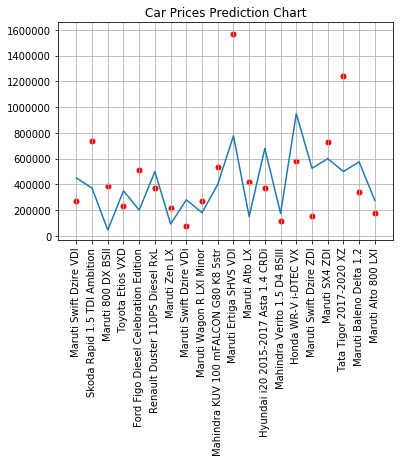

In [115]:
x_values = X.index
y_values = y

plt.xlabel = 'Car Models'
plt.ylabel = 'Prices'
plt.plot(x_values[0:20],y_values[0:20])
plt.xticks(rotation=90)
plt.scatter(x_values[0:20],y_pred_cat[0:20],linewidth=0.0001,color= 'r')
plt.title('Car Prices Prediction Chart')
plt.grid()

In [116]:
#Not much differences...